# Transformada de Fourier Discreta

Neste notebook irei demonstrar a implementação da transformada discreta de Fourier, tanto a forma direta como a inversa. Irei aplicar a transformada em algumas funções simples, com o intuito de ilustrar a distribuição de frequências e amplitudes nestas funções. A implementação serve como uma forma de estudo da DFT. No entanto, irei implementar funções que não são otimizadas, ou seja, não aplicada transformada rápida de Fourier (FFT).   

## Como definir a transformada de Fourier Discreta?

**Definição 1**: Uma função amostrada $ \tilde{f}: \mathbb{R} \rightarrow \mathbb{R}$ terá como transformada discreta uma função $\tilde{F}: \mathbb{R} \rightarrow \mathbb{C}$ definida pela expressão 

$$ \tilde{F}(\omega) = \frac{\Delta t}{\sqrt{2 \pi}} \sum_{- \infty}^{+\infty} \tilde{f}(k \Delta t) e^{-i w k\Delta t}.$$


**Definição 2**: Se a transformada discreta $\tilde{F}: \mathbb{R} \rightarrow \mathbb{C}$ é a transformada de Fourier discreta de uma função amostrada $\tilde{f}: \mathbb{R} \rightarrow \mathbb{R}$ a transformada inversa de Fourier discreta pode ser definida como

$$ \tilde{f}(t) = \frac{\Delta w}{\sqrt{2 \pi}} \sum_{- \infty}^{+\infty} \tilde{F}(k \Delta w) e^{i w k\Delta t}.$$

## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Implementando a transformada de Fourier Discreta

In [2]:
def ft(x,f,w,dx,n):
    """
    Implementing a dummy fourier transform
    """
    
    F = np.empty(n) + 0j
    for i in range(n):
        F[i] = np.sum(f*np.exp(-1j*w[i]*x))*dx
        F[i] /= np.sqrt(2.*np.pi) 
    
    return (F)

def ift(x,F,w,dw,n):
    """
    Implementing an inverse dummy fourier transform
    """
    
    f = np.empty(n) 
    for i in range(n):
        f[i] = np.real(np.sum(F*np.exp(1j*w*x[i]))*dw)
        f[i] /= np.sqrt(2.*np.pi) 
    
    return f

## Função retangular

A função retangular é definida como:

$$ f(x) =\begin{cases}
 & 1, \quad \text{se} \left\lvert x \right\rvert  < 1 \\
 & 0, \quad \text{se}  \left\lvert x \right \rvert > 1 
\end{cases} $$

Neste sentido, ao resolvermos a transformada de Fourier para esta função, teremos uma função na frequência igual a:

$$ F(\omega) = \sqrt{\frac{2}{\pi}} \frac{\sin{\omega}}{\omega}$$. 

In [3]:
n = 1000
x = np.linspace(-20., 20., n)

In [4]:
def rectangular_pulse(x):
    """
    Function for calculating a rectangular pulse for FFT
    """
    
    y = np.zeros(x.size)
    for i in range(x.size):
        if np.abs(x[i])<1.:
            y[i] = 1.
        elif np.abs(x[i])>1:
            y[i] = 0.
    return y

In [5]:
f_rec = rectangular_pulse(x)

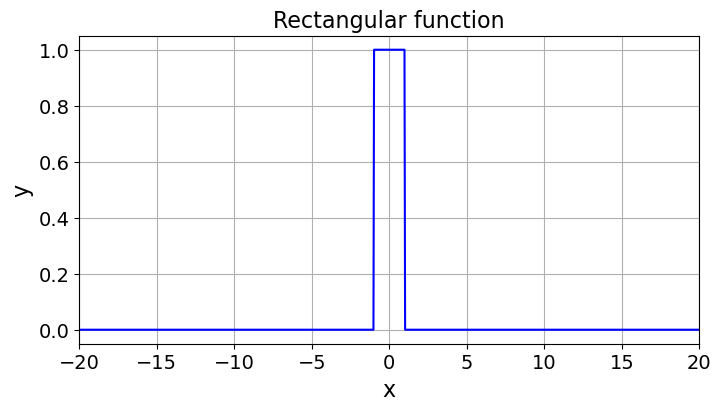

In [6]:
plt.figure(figsize=(8,4))
plt.title('Rectangular function',fontsize=16)
plt.plot(x,f_rec,'b-')
plt.xlim(np.min(x),np.max(x))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.grid()
plt.show()

### Função exponencial 

A função exponencial é definida como:

$$f(x) =\begin{cases}
 & e^{-a x}, \quad \text{se}  \quad x,a  > 0 \\
 & \quad \,  0, \quad \text{se}  \quad x < 0 
\end{cases}$$

Neste sentido, ao resolvermos a transformada de Fourier para esta função, teremos uma função na frequência igual a:

$$ F(\omega) = \frac{1}{\sqrt{2 \pi} (a+i\omega)}$$. 

In [7]:
n = 1000
x = np.linspace(-20., 20., n)

In [8]:
def exponential_pulse(x):
    """
    Function for calculating an exponential pulse for FFT
    """
    y = np.empty(x.size)
    for i in range(x.size):
        if x[i]>0 :
            y[i] = np.exp(-2*x[i])
        elif x[i]<0 :
            y[i] = 0.
    
    return y
    

In [9]:
f_exp = exponential_pulse(x)

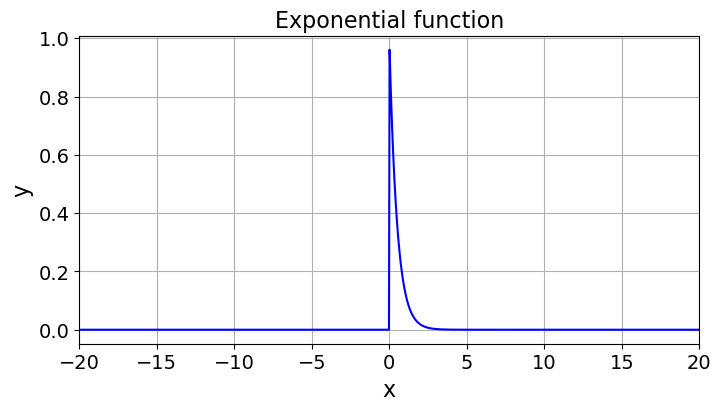

In [10]:
plt.figure(figsize=(8,4))
plt.title('Exponential function',fontsize=16)
plt.plot(x,f_exp,'b-')
plt.xlim(np.min(x),np.max(x))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.grid()
plt.show()

## Calculando as transformadas de Fourier discreta

### Para o pulso retangular

In [11]:
dx = 40./(n-1)
dw = 2.*np.pi/n/dx
w = np.arange(n)*dw - n*dw/2

In [12]:
F_rec = ft(x,f_rec,w,dx,n)

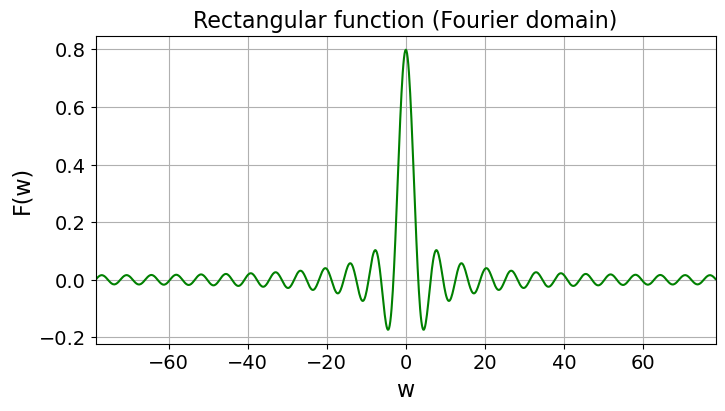

In [13]:
plt.figure(figsize=(8,4))
plt.title('Rectangular function (Fourier domain)',fontsize=16)
plt.plot(w,np.real(F_rec),'g-')
plt.xlim(np.min(w),np.max(w))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('w',fontsize=16)
plt.ylabel('F(w)',fontsize=16)
plt.grid()
plt.show()

### Para o pulso exponencial 

In [14]:
F_exp = ft(x,f_exp,w,dx,n)

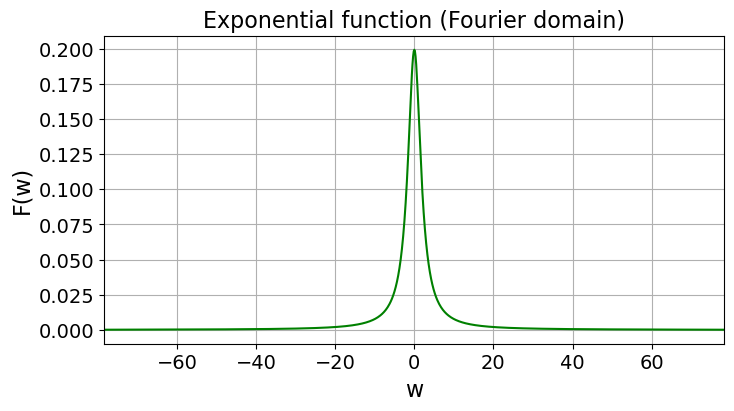

In [15]:
plt.figure(figsize=(8,4))
plt.title('Exponential function (Fourier domain)',fontsize=16)
plt.plot(w,np.real(F_exp),'g-')
plt.xlim(np.min(w),np.max(w))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('w',fontsize=16)
plt.ylabel('F(w)',fontsize=16)
plt.grid()
plt.show()